In [27]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper2 import boxplot_los_groupby, plot_los_groupby 

In [2]:
# Primary Admissions information
df = pd.read_csv('data/ADMISSIONS.csv')

# Patient specific info such as gender
df_pat = pd.read_csv('data/PATIENTS.csv')

# Diagnosis for each admission to hospital
df_diagcode = pd.read_csv('data/DIAGNOSES_ICD.csv')

# Intensive Care Unit (ICU) for each admission to hospital
df_icu = pd.read_csv('data/ICUSTAYS.csv')

## ADMISSIONS.csv

several things I want to address in this table 

* calculate LOS for each admission event
* remove negative LOS
* remove admission which leads to death


In [7]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


### LOS

In [8]:
df['ADMITTIME'] = pd.to_datetime(df['ADMITTIME'])
df['DISCHTIME'] = pd.to_datetime(df['DISCHTIME'])
df['LOS'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.total_seconds()/86400
df[['ADMITTIME', 'DISCHTIME', 'LOS']].head()

,ADMITTIME,DISCHTIME,LOS
0,2196-04-09 12:26:00,2196-04-10 15:54:00,1.144444
1,2153-09-03 07:15:00,2153-09-08 19:10:00,5.496528
2,2157-10-18 19:34:00,2157-10-25 14:00:00,6.768056
3,2139-06-06 16:14:00,2139-06-09 12:48:00,2.856944
4,2160-11-02 02:06:00,2160-11-05 14:55:00,3.534028


In [13]:
df = df[df['LOS'] > 0]
df['DECEASED'] = df['DEATHTIME'].notnull().map({True:1, False:0})
df = df[df['DECEASED'] == 0]

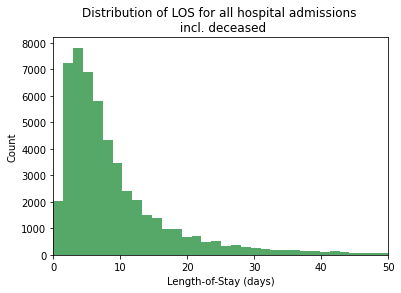

In [14]:
# Plot LOS Distribution
plt.hist(df['LOS'], bins=200, color = '#55a868')
plt.xlim(0, 50)
plt.title('Distribution of LOS for all hospital admissions \n incl. deceased')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.tick_params(top=False, right=False) 
plt.show();

In [15]:
df['LOS'].describe()

count    53104.000000
mean        10.138174
std         12.284461
min          0.014583
25%          3.866667
50%          6.565972
75%         11.711632
max        294.660417
Name: LOS, dtype: float64

In [34]:
df['ADMISSION_TYPE'].value_counts()

EMERGENCY    36627
NEWBORN       7797
ELECTIVE      7505
URGENT        1175
Name: ADMISSION_TYPE, dtype: int64

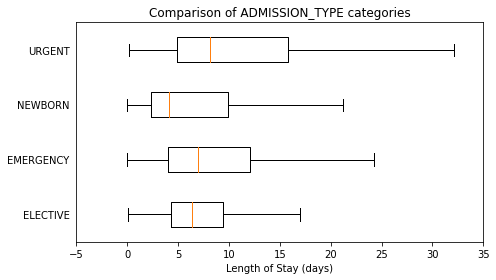

In [35]:
boxplot_los_groupby(df, 'ADMISSION_TYPE', los_range=(-5, 35), size=(7, 4))

In [36]:
df['INSURANCE'].value_counts()

Medicare      24308
Private       21188
Medicaid       5401
Government     1693
Self Pay        514
Name: INSURANCE, dtype: int64

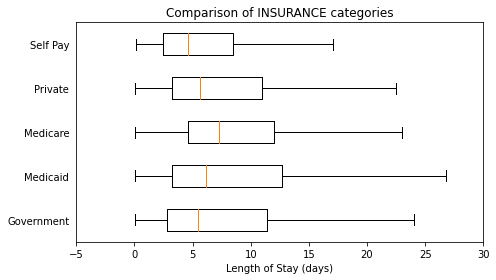

In [38]:
boxplot_los_groupby(df, 'INSURANCE', los_range=(-5, 30), size=(7, 4))

In [39]:
df['MARITAL_STATUS'].value_counts(dropna=False)


MARRIED              21623
SINGLE               12158
NaN                   9459
WIDOWED               6158
DIVORCED              2894
SEPARATED              517
UNKNOWN (DEFAULT)      280
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

In [40]:
# Fix NaNs and file under 'UNKNOWN'
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)')
df['MARITAL_STATUS'].value_counts(dropna=False)

MARRIED              21623
SINGLE               12158
UNKNOWN (DEFAULT)     9739
WIDOWED               6158
DIVORCED              2894
SEPARATED              517
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

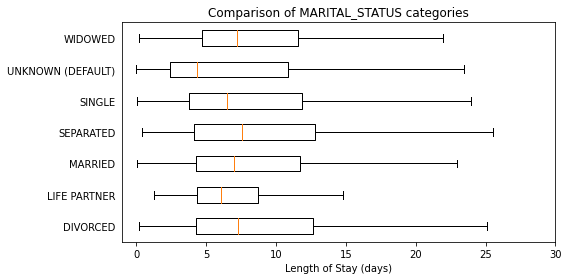

In [44]:
boxplot_los_groupby(df, 'MARITAL_STATUS')

In [17]:
df['ETHNICITY'].value_counts()

WHITE                                                       36938
BLACK/AFRICAN AMERICAN                                       5039
UNKNOWN/NOT SPECIFIED                                        3782
HISPANIC OR LATINO                                           1590
ASIAN                                                        1404
OTHER                                                        1389
UNABLE TO OBTAIN                                              655
PATIENT DECLINED TO ANSWER                                    518
ASIAN - CHINESE                                               250
HISPANIC/LATINO - PUERTO RICAN                                220
BLACK/CAPE VERDEAN                                            188
WHITE - RUSSIAN                                               142
MULTI RACE ETHNICITY                                          121
BLACK/HAITIAN                                                  95
ASIAN - ASIAN INDIAN                                           82
HISPANIC/L

In [18]:
# Compress the number of ethnicity categories
df['ETHNICITY'].replace(regex=r'^ASIAN\D*', value='ASIAN', inplace=True)
df['ETHNICITY'].replace(regex=r'^WHITE\D*', value='WHITE', inplace=True)
df['ETHNICITY'].replace(regex=r'^HISPANIC\D*', value='HISPANIC/LATINO', inplace=True)
df['ETHNICITY'].replace(regex=r'^BLACK\D*', value='BLACK/AFRICAN AMERICAN', inplace=True)
df['ETHNICITY'].replace(['UNABLE TO OBTAIN', 'OTHER', 'PATIENT DECLINED TO ANSWER', 
                         'UNKNOWN/NOT SPECIFIED'], value='OTHER/UNKNOWN', inplace=True)
df['ETHNICITY'].loc[~df['ETHNICITY'].isin(df['ETHNICITY'].value_counts().nlargest(5).index.tolist())] = 'OTHER/UNKNOWN'
df['ETHNICITY'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


WHITE                     37235
OTHER/UNKNOWN              6645
BLACK/AFRICAN AMERICAN     5363
HISPANIC/LATINO            2006
ASIAN                      1855
Name: ETHNICITY, dtype: int64

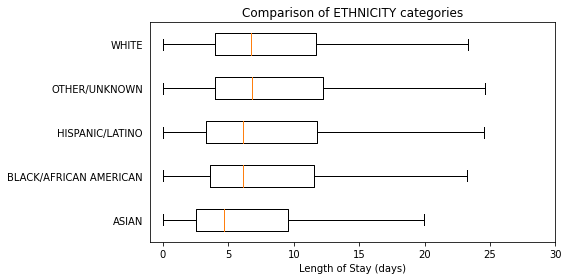

In [28]:
boxplot_los_groupby(df, 'ETHNICITY', los_range=(-1, 30))

In [29]:
df['RELIGION'].value_counts()

CATHOLIC                  18676
NOT SPECIFIED             10816
UNOBTAINABLE               7151
PROTESTANT QUAKER          6473
JEWISH                     4644
OTHER                      2480
EPISCOPALIAN                706
GREEK ORTHODOX              421
CHRISTIAN SCIENTIST         397
BUDDHIST                    248
MUSLIM                      212
JEHOVAH'S WITNESS           122
UNITARIAN-UNIVERSALIST      106
HINDU                       104
7TH DAY ADVENTIST            76
ROMANIAN EAST. ORTH          72
BAPTIST                      20
HEBREW                       12
METHODIST                     6
LUTHERAN                      1
Name: RELIGION, dtype: int64

In [31]:
# Reduce categories to terms of religious or not
# I tested with and without category reduction, with little change in R2 score
df['RELIGION'].loc[~df['RELIGION'].isin(['NOT SPECIFIED', 'UNOBTAINABLE'])] = 'RELIGIOUS'

print(df['RELIGION'].value_counts())

RELIGIOUS        35137
NOT SPECIFIED    10816
UNOBTAINABLE      7151
Name: RELIGION, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


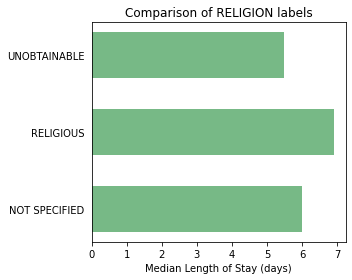

In [33]:
# Look at median LOS for groups
plot_los_groupby(df, 'RELIGION', size=(5,4))

## DIAGNOSES_ICD.csv

There are about 7000 ICD9 codes in the dataset. It's not feasible to handle all the codes. I will aggregate them into higher levels based on ICD9 code categories. ( https://en.wikipedia.org/wiki/List_of_ICD-9_codes )

* List of ICD-9 codes 001–139: infectious and parasitic diseases
* List of ICD-9 codes 140–239: neoplasms
* List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
* List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
* List of ICD-9 codes 290–319: mental disorders
* List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
* List of ICD-9 codes 390–459: diseases of the circulatory system
* List of ICD-9 codes 460–519: diseases of the respiratory system
* List of ICD-9 codes 520–579: diseases of the digestive system
* List of ICD-9 codes 580–629: diseases of the genitourinary system
* List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
* List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
* List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
* List of ICD-9 codes 740–759: congenital anomalies
* List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
* List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
* List of ICD-9 codes 800–999: injury and poisoning
* List of ICD-9 codes E and V codes: external causes of injury and supplemental classification


In [45]:

df_diagcode['recode'] = df_diagcode['ICD9_CODE']
df_diagcode['recode'] = df_diagcode['recode'][~df_diagcode['recode'].str.contains("[a-zA-Z]").fillna(False)]
df_diagcode['recode'].fillna(value='999', inplace=True)
df_diagcode['recode'] = df_diagcode['recode'].str.slice(start=0, stop=3, step=1)
df_diagcode['recode'] = df_diagcode['recode'].astype(int)
icd9_ranges = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390), 
               (390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000), (1000, 2000)]
diag_dict = {0: 'infectious', 1: 'neoplasms', 2: 'endocrine', 3: 'blood',
             4: 'mental', 5: 'nervous', 6: 'circulatory', 7: 'respiratory',
             8: 'digestive', 9: 'genitourinary', 10: 'pregnancy', 11: 'skin', 
             12: 'muscular', 13: 'congenital', 14: 'prenatal', 15: 'misc',
             16: 'injury', 17: 'misc'}
for num, cat_range in enumerate(icd9_ranges):
    df_diagcode['recode'] = np.where(df_diagcode['recode'].between(cat_range[0],cat_range[1]), 
            num, df_diagcode['recode'])
df_diagcode['recode'] = df_diagcode['recode']
df_diagcode['cat'] = df_diagcode['recode'].replace(diag_dict)
# Verify
df_diagcode.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,recode,cat
0,1297,109,172335,1.0,40301,6,circulatory
1,1298,109,172335,2.0,486,7,respiratory
2,1299,109,172335,3.0,58281,9,genitourinary
3,1300,109,172335,4.0,5855,9,genitourinary
4,1301,109,172335,5.0,4254,6,circulatory


In [46]:
hadm_list = df_diagcode.groupby('HADM_ID')['cat'].apply(list).reset_index()
hadm_list.head()

,HADM_ID,cat
0,100001,"[endocrine, nervous, genitourinary, digestive,..."
1,100003,"[digestive, blood, infectious, digestive, circ..."
2,100006,"[respiratory, respiratory, respiratory, neopla..."
3,100007,"[digestive, digestive, injury, respiratory, ci..."
4,100009,"[circulatory, injury, circulatory, endocrine, ..."


In [47]:

hadm_item = pd.get_dummies(hadm_list['cat'].apply(pd.Series).stack()).sum(level=0)
hadm_item.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin
0,0,2,0,2,5,2,0,2,0,0,0,0,2,0,0,0,1
1,1,2,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,2,1,1,0,1,0,0,0,3,0
3,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,7,0,0,3,0,0,7,0,0,0,0,0,0,0,0,0


In [48]:
hadm_item = hadm_item.join(hadm_list['HADM_ID'], how="outer")


,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,HADM_ID
0,0,2,0,2,5,2,0,2,0,0,0,0,2,0,0,0,1,100001
1,1,2,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,100003
2,0,0,0,0,1,0,0,2,1,1,0,1,0,0,0,3,0,100006
3,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,100007
4,1,7,0,0,3,0,0,7,0,0,0,0,0,0,0,0,0,100009


In [49]:
df = df.merge(hadm_item, how='inner', on='HADM_ID')

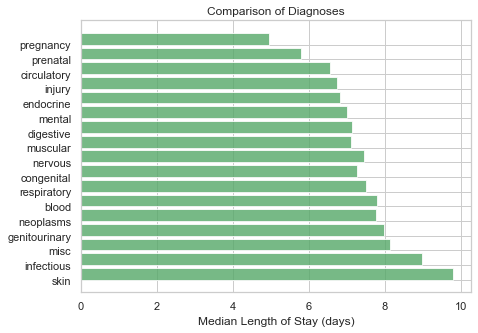

In [50]:
# Look at the median LOS by diagnosis category
diag_cat_list = ['skin', 'infectious',  'misc', 'genitourinary', 'neoplasms', 'blood', 'respiratory', 
                  'congenital','nervous', 'muscular', 'digestive', 'mental', 'endocrine', 'injury',
                 'circulatory', 'prenatal',  'pregnancy']

results = []
for variable in diag_cat_list:
    results.append(df[[variable, 'LOS']].groupby(variable).median().reset_index().values[1][1])

sns.set(style="whitegrid")
#sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7,5))
ind = range(len(results))
ax.barh(ind, results, align='edge', color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(diag_cat_list)
ax.set_xlabel('Median Length of Stay (days)')
ax.tick_params(left=False, right=False, top=False) 
ax.set_title('Comparison of Diagnoses'.format(variable))
plt.show();

## PATIENTS.csv

the data set provides date of birth but not age. I will calculate age. 



In [52]:
df_pat['DOB'] = pd.to_datetime(df_pat['DOB'])
df = df.merge(df_pat, how='inner', on='SUBJECT_ID')

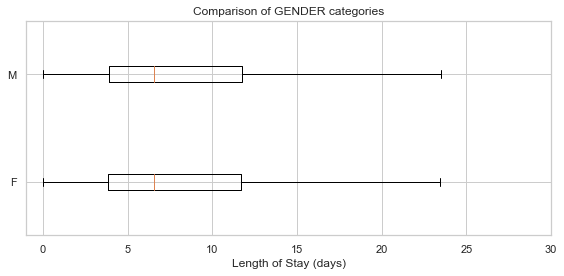

In [53]:
boxplot_los_groupby(df, 'GENDER', los_range=(-1, 30))

In [55]:
df_age_min = df[['SUBJECT_ID', 'ADMITTIME']].groupby('SUBJECT_ID').min().reset_index()
df_age_min.columns = ['SUBJECT_ID', 'ADMIT_MIN']
df = df.merge(df_age_min, how='outer', on='SUBJECT_ID')

In [58]:
df['ADMIT_MIN_temp'] = df['ADMIT_MIN'].apply(lambda x : int(str(x)[0:4]))
df['DOB_temp'] = df['DOB'].apply(lambda x : int(str(x)[0:4]))
df['age'] = (df['ADMIT_MIN_temp'] - df['DOB_temp'])
df['age'] = np.where(df['age'] < 0, 90, df['age'])

df['age'] = np.where(df['age'] >200, 90, df['age'])

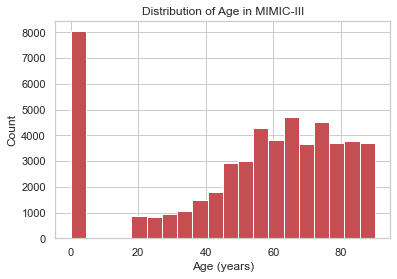

In [59]:
# Note that no ‘middle’ patients show up - this reflects the fact that MIMIC-III does not contain data from pediatric patients.
plt.hist(df['age'], bins=20, color='#c44e52')
plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.title('Distribution of Age in MIMIC-III')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show();

(1.0, 50.0)

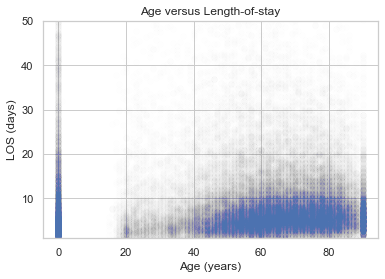

In [60]:
plt.scatter(df['age'], df['LOS'], alpha=0.005)
#plt.yscale('sqrt')
plt.ylabel('LOS (days)')
plt.xlabel('Age (years)')
plt.title('Age versus Length-of-stay')
plt.ylim(1, 50)

In [69]:

age_ranges = [(0, 13), (13, 36), (36, 56), (56, 100)]
for num, cat_range in enumerate(age_ranges):
    df['age'] = np.where(df['age'].between(cat_range[0],cat_range[1]), 
            num, df['age'])
    
age_dict = {0: 'newborn', 1: 'young_adult', 2: 'middle_adult', 3: 'senior'}
df['age'] = df['age'].replace(age_dict)

df.age.value_counts()

senior          29660
middle_adult    11488
young_adult      3914
Name: age, dtype: int64

## ICUSTAYS.csv

In [70]:

df_icu['FIRST_CAREUNIT'].replace({'CCU': 'ICU', 'CSRU': 'ICU', 'MICU': 'ICU',
                                  'SICU': 'ICU', 'TSICU': 'ICU'}, inplace=True)
df_icu['cat'] = df_icu['FIRST_CAREUNIT']
icu_list = df_icu.groupby('HADM_ID')['cat'].apply(list).reset_index()

icu_item = pd.get_dummies(icu_list['cat'].apply(pd.Series).stack()).sum(level=0)
icu_item[icu_item >= 1] = 1
icu_item = icu_item.join(icu_list['HADM_ID'], how="outer")
icu_item.head()

,ICU,NICU,HADM_ID
0,1,0,100001
1,1,0,100003
2,1,0,100006
3,1,0,100007
4,1,0,100009


In [71]:
df = df.merge(icu_item, how='outer', on='HADM_ID')
df['ICU'].fillna(value=0, inplace=True)
df['NICU'].fillna(value=0, inplace=True)

In [76]:
df.drop(columns=['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'ADMISSION_LOCATION',
                'DISCHARGE_LOCATION', 'LANGUAGE', 'ADMIT_MIN', 'DOB', 'ADMIT_MIN_temp', 'DOB_temp',
                'DIAGNOSIS', 'DECEASED',  'DEATHTIME', 'HOSPITAL_EXPIRE_FLAG','EXPIRE_FLAG'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58811 entries, 0 to 58810
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID_x              45062 non-null  float64       
 1   DISCHTIME             45062 non-null  datetime64[ns]
 2   ADMISSION_TYPE        45062 non-null  object        
 3   INSURANCE             45062 non-null  object        
 4   RELIGION              45062 non-null  object        
 5   MARITAL_STATUS        45062 non-null  object        
 6   ETHNICITY             45062 non-null  object        
 7   EDREGTIME             26783 non-null  object        
 8   EDOUTTIME             26783 non-null  object        
 9   HAS_CHARTEVENTS_DATA  45062 non-null  float64       
 10  LOS                   45062 non-null  float64       
 11  blood                 45062 non-null  float64       
 12  circulatory           45062 non-null  float64       
 13  congenital      